# **Linear regression** in sklearn:

Here we'll use `sklearn` library and as usual begin with data preprocessing.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

For demonstration we will download Automobile Data Set in which are presented categorical features.

ML problem here is to predict the price of automobile.

In [2]:
X_raw = pd.read_csv(
    "Automobile_data.csv",
    header=None,
    na_values=['?']
)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Divide features and target variable:

In [3]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

### Filling the gaps in features

In an objects-features matrix may be gaps, and it may be a cause of falling of the ML algorithm of even data preprocessing process.

If number of gaps is small, you can just remove the columns or raws, but if number is significant, you must fill the gaps.
You can do it by the following ways:
* Fill by the means (mean, median)
* Predict gaps by other values in the raw

The last option is difficult and quite rarely used. For filling by constants you can use `fillna` method and fill them by means - class `impute.SimpleImputer`.

Check whether there are gaps in our data:

In [4]:
# Check for gaps at all

X_raw.isnull().any().any()

True

In [5]:
# Check summ of gaps in features by particular columns

X_raw.isnull().sum()

0      0
1     41
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
# making a mask on data
cat_features_mask = (X_raw.dtypes == 'object').values # True if it is categorical feature

# for real-number features fill the gaps by means
X_real = X_raw[X_raw.columns[~cat_features_mask]] # ~ means negation (non-categorical features)
mis_replaser = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replaser.fit_transform(X_real), columns=X_real.columns)

# for categorical features by empty raws
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### Transforms of non-numerical features

Because letters can be represented by numers in ASCII codification, you must check whether you can use your data as numbers, even if in your table you see numbers (especially integer numbers) - it may be a letter or a word. Another example - ID of some user or object. It usually represented by long integer number but you can't, for instance, sum two ID.

THe examples above are examples of categorical features. To such features usually apply one-hot encoding (instead of one feature you make **K** binary features - one for each possible value of original featuure). In `sklearn` it may be made with classes `LabelEncoder` plus `OneHotEncoding`, but is much easier to use function `get_dummies` from `pandas`.

<u>Note</u>: In the object-feature matrix will be many zero values. To avoid of store all these zero values you can use parameter `OneHotEncoder(sparse=True)` or `pandas.get_dummies(sparse=True)`. In this case the method will return to you a sparse matrix with only non-zero values.
Operations with such a matrix may be not effective, but most of methods of `sklearn` can deal with such matrices.

You can see an example below:

In [8]:
print(f"Shape before encoding: {X_no_mis.shape}")
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(f"Shape after encoding: {X_dum.shape}")

Shape before encoding: (205, 25)
Shape after encoding: (205, 66)


In [9]:
X_dum

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


### Scaling of features

While starting the work with you data it's recommended to bring all the features to the same scale. It's important to keep numerical robust while working with objects-features matrix: 
* Numerical error will be collected during calculation near zero on each iteration because of loss data in positions far from floating dot - addition or substraction can return the same result as it was before because significant numbers are located further than resolution of your operational system let your algorithm see.
* Dividing by numbers near zero makes very huge numbers and it also provides loss of data during further additions or subtractions, especially during arithmetical operations with small numbers.

Moreover, if you speak about ML, scaling of features provides increasing of interpretivism of you model's results.

A popular method of scaling is normalization - subtraction of mean from each value and dividing of the difference by standard deviation (`StandardScaler` in `sklearn`).
Second popular method is subtraction of the minimum from each feature and then dividing by difference of maximal and minimal value (`MinMaxScaler` in `sklearn`).

In [10]:
from sklearn import preprocessing

In [11]:
normalizer = preprocessing.MinMaxScaler()

X_dum.columns = X_dum.columns.astype(str) # It's needed because fit_transform works only with str columns

X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Adding of new features

A very important point for linear regression are non-linear features transforms. It provides use linear regression with non-linear features (<u>**linear regression can't match non-linear features**</u>).

The most popular transforms are:
* Polinomial features (PolynomialFeatures in `sklearn`)
* Using of logarithm
* Using of sqare root function
* Using of trigonometric functions

In [12]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

For example, we can note the dependence of target variable from sixth feature from X above more square than linear:

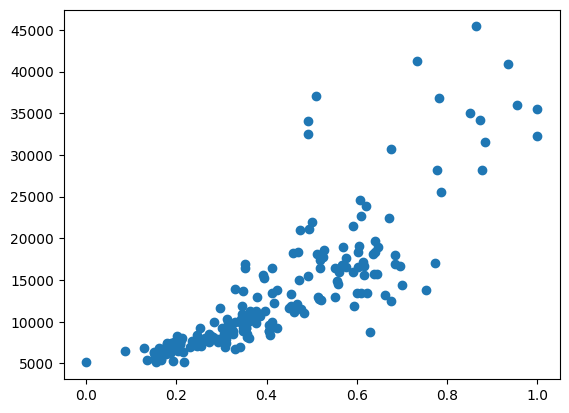

In [13]:
plt.scatter(X[6], y)
plt.show();

Indeed, when we had squared the feature, we could see the feature became more linear.

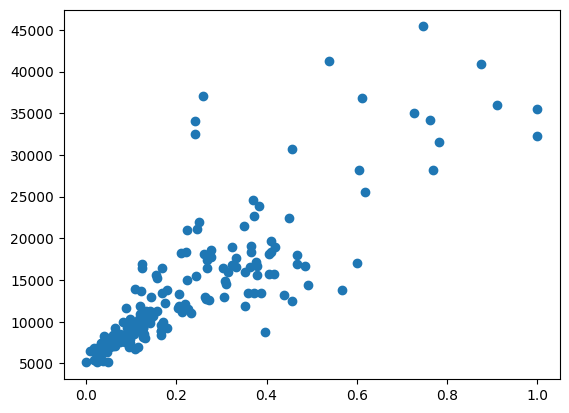

In [14]:
plt.scatter(X[6] ** 2, y)
plt.show();

Another example. For the feature number 13 we can linearize it by using function $\dfrac{1}{\sqrt{x}}$

This is because the dependence of target variable from the feature seems in accordance to such a function. So we must to bring the feature and the target variable to one to linearize the dependence.

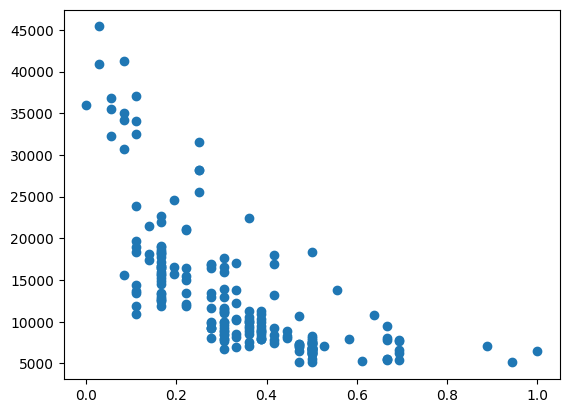

In [15]:
plt.scatter(X[13], y)
plt.show();

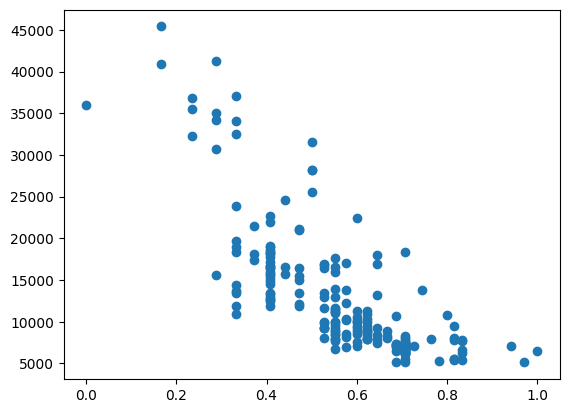

In [16]:
plt.scatter(np.sqrt(X[13]), y)
plt.show();

<u><b>Note</b></u>: while generation the polynomial features the object-features matrix may takes a lot of memory.

## Loss functions in regression

Quality functional in supervised learning problems is usually given in the form of sum by objets of the sample:
$$Q(a) = \dfrac{1}{\ell} \sum_{i=1}^\ell L(y_{i}, a(x_{i})) , $$
where $L(.,.)$ - loss function, given fine for difference between prediction and Ground Truth value. Properties of the loss function:
* $L(y_{i}, a(x_{i})) \ge 0$
* $L(y_{i}, y_{i}) = 0$

In practice the quality functional firstly must match your customer's requirements. It sometimes leads to functionals inconvenient to optimization.

<u><b>Example</u></b>: If we do not distinguish small errors (between 0.01 and 0.1 may not have any significant difference in scale of our possible problem), but we also don't want to have significant errors we can use the following loss function:
$$L(y_{i}, a(x_{i})) = |y_{i} - a(x_{i})| < \varepsilon ,$$
where $\varepsilon$ - admissible difference between prediction and Ground Truth.

Below we'll consider main optimization loss functions using in classic ML models. We'll consider only main loss functions because there are huge number loss functions at all. You can find all of them in `sklearn` library (or in `pytorch` if we speak about Deep Learning).

### Mean Square Error (MSE)

In this approach $L(y_{i}, a(x_{i})) = (a(x_{i}) - y_{i})^2$, so we obtain
$$MSE(a, X, Y) = \dfrac{1}{L} \sum_{i=1}^L (a(x_{i}) - y_{i})^2$$

Besides of customer's requirements you must account mathematical peculiarities of your model, for instance, sustainability to noise objects.

In linear regression MSE doesn't have such a property because gives huge fines for big deviations from Ground Truth.

Let's consider an example. Take the feature with linear dependence from target variable (feature 15 in X matrix, for example), and add to the sample two outlier objects. We want to understand how MSE line will change.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X_subset = X[[7, 15]].values
# Add two noise objects
X_subset_mod = np.vstack(
    (X_subset, [[1, 90], [2, 50]])
)

In [24]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1],) # Points visualization
    lr = LinearRegression()
    lr.fit(
        X_subset[:, 0][:, np.newaxis], X_subset[:, 1]
    ) # calculation of weights of the linear model

    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)

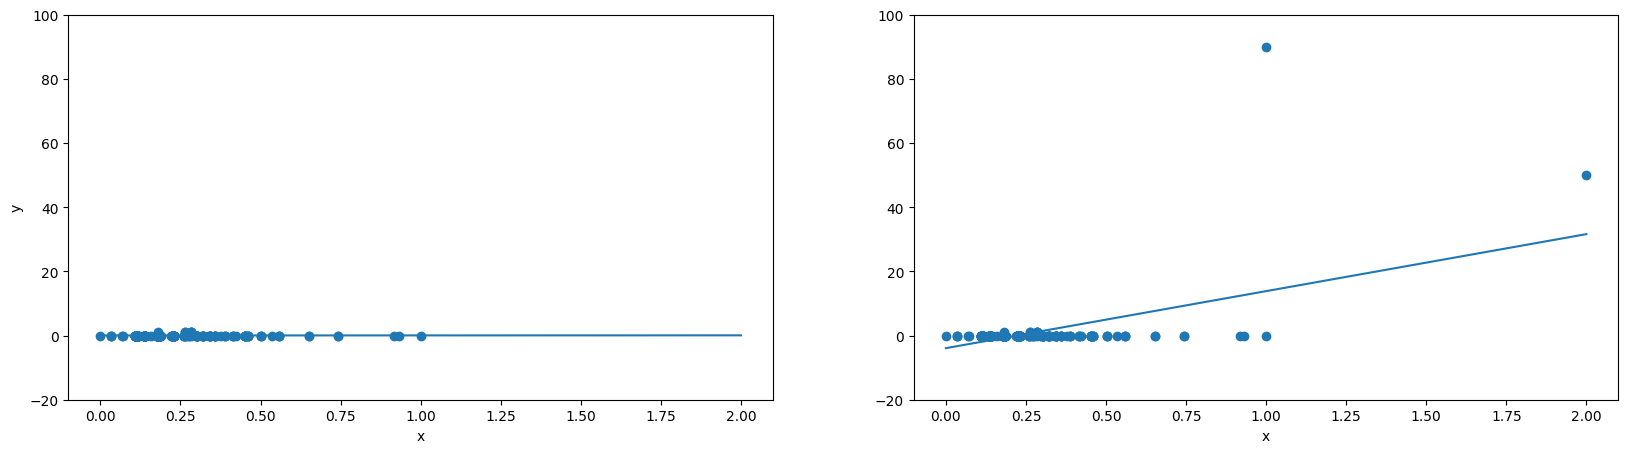

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_mod)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show();

As you can see, outlier objects have very significant influence on this loss function.

Let's implement MSE as a function

In [27]:
def MSE(y : np.array, y_pred : np.array) -> np.float64:
    return sum((y - y_pred) ** 2) / y.shape[0]

a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
mse = MSE(y=a, y_pred=pred)
print("Mean Square Error is", mse)

Mean Square Error is 1.45


### Root Mean Square Error (RMSE)

Because of MSE stores square of initial data the results of loss calculation may be difficult to interpretation. To return the initial quantities you can apply root square to MSE. Such an approach calls RMSE

$$RMSE(a, X, Y) = \sqrt{MSE(a, X, Y)} = \sqrt{\dfrac{1}{L} \sum_{i=1}^L (a(x_{i}) - y_{i})^2}$$

Let's implement RMSE as a function

In [28]:
def RMSE(y : np.array, y_pred : np.array) -> np.float64:
    return np.sqrt(MSE(y, y_pred))

a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
rmse = RMSE(y=a, y_pred=pred)
print("Root Mean Square Error is", rmse)

Root Mean Square Error is 1.2041594578792296


Determination coefficient <b>$R^2$</b> shows part of dispersion in target variable which can be explained by dependent variables. <b>$R^2$</b> can be interpreted as some kind of normalized MSE.
$$R^2(a, X, Y) = 1 - \dfrac{\sum_{i=1}^L (a(x_{i}) - y_{i})^2}{\sum_{i=1}^L (y_{i} - \overline{y})^2}$$

Let's implement <b>$R^2$</b> as a function

In [29]:
def R_sq(y : np.array, y_pred : np.array) -> np.float64:
    return 1 - ( sum((y - y_pred) ** 2) / sum((y - y.mean()) ** 2))

a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
r_sq = R_sq(y=a, y_pred=pred)
print("R_square is", r_sq)

R_square is 0.914906103286385


### Mean Absolute Error (MAE)

If we want to avoid of huge influence of noise objects on incline of the regression line, we can use MAE instead of MSE (this is one option from set of many).
$$MAE(a, X, Y) = \dfrac{1}{L} \sum_{i=1}^L |a(x_{i}) - y_{i}|$$

Now let's start to train a regression model by optimizing MAE. In `sklearn` such a regression doesn't implemented, but we can use the module `statsmodels` and obtain required model by training quantile regression with parameter `q=0.5`.

As the first step, implement MAE as a function

In [32]:
def MAE(y : np.array, y_pred : np.array) -> np.float64:
    return np.sum(np.abs(y - y_pred))/y.shape[0]

a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
mae = MAE(y=a, y_pred=pred)
print("MAE is", mae)

MAE is 1.1


Now we implement the model via `statsmodels`.
We'll add two outlier objects as in example for MSE to show difference.

In [33]:
import statsmodels.formula.api as smf

In [38]:
def scatter_points_and_plot_line_MAE(X_subset):

    mod = smf.quantreg("f15 ~ f7", pd.DataFrame(data=X_subset, columns=["f7", "f15"]))
    res = mod.fit(q=0.5)
    
    plt.scatter(X_subset[:, 0], X_subset[:, 1],) # Points visualization
    grid = np.linspace(0, 2, 100)
    
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])
    return mod, res

C:\Users\akalyuzhin\Workenv\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
C:\Users\akalyuzhin\Workenv\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
C:\Users\akalyuzhin\Workenv\lib\site-packages\statsmodels\regression\quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


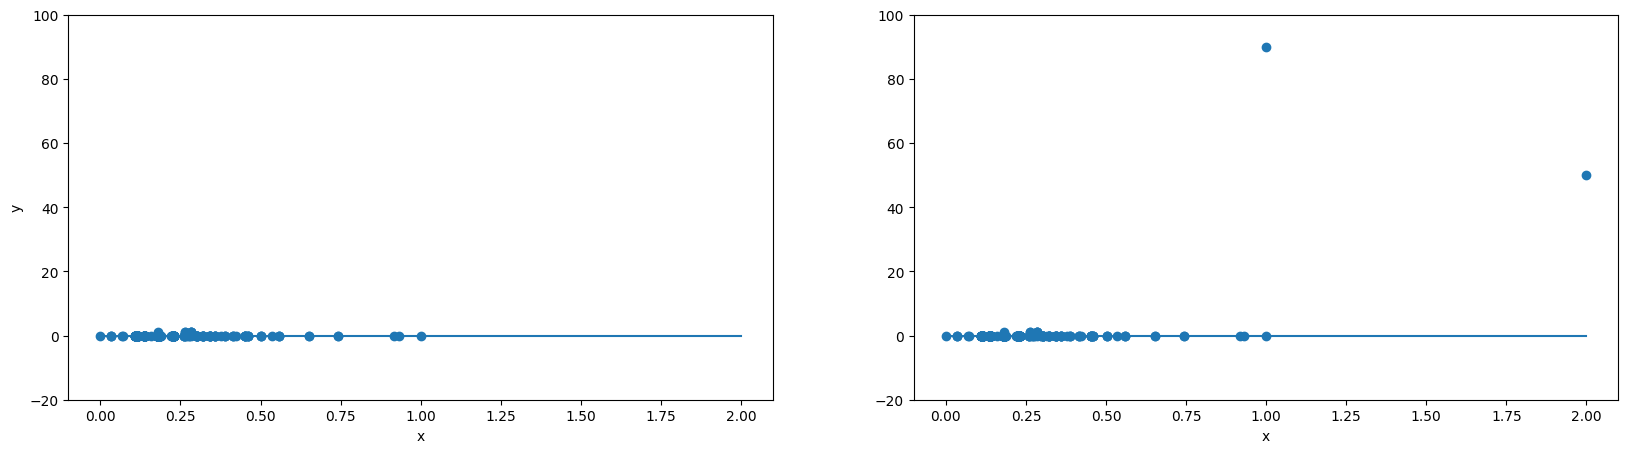

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_mod)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show();

As you can see, model doesn't react on outliers.

Let's try more outliers.

In [40]:
np.random.seed(13)

X_subset_mod_twice = np.vstack(
    (X_subset_mod, np.random.randint(5, size=60).reshape(-1, 2) * [1, 30])
)

C:\Users\akalyuzhin\Workenv\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
C:\Users\akalyuzhin\Workenv\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
C:\Users\akalyuzhin\Workenv\lib\site-packages\statsmodels\regression\quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


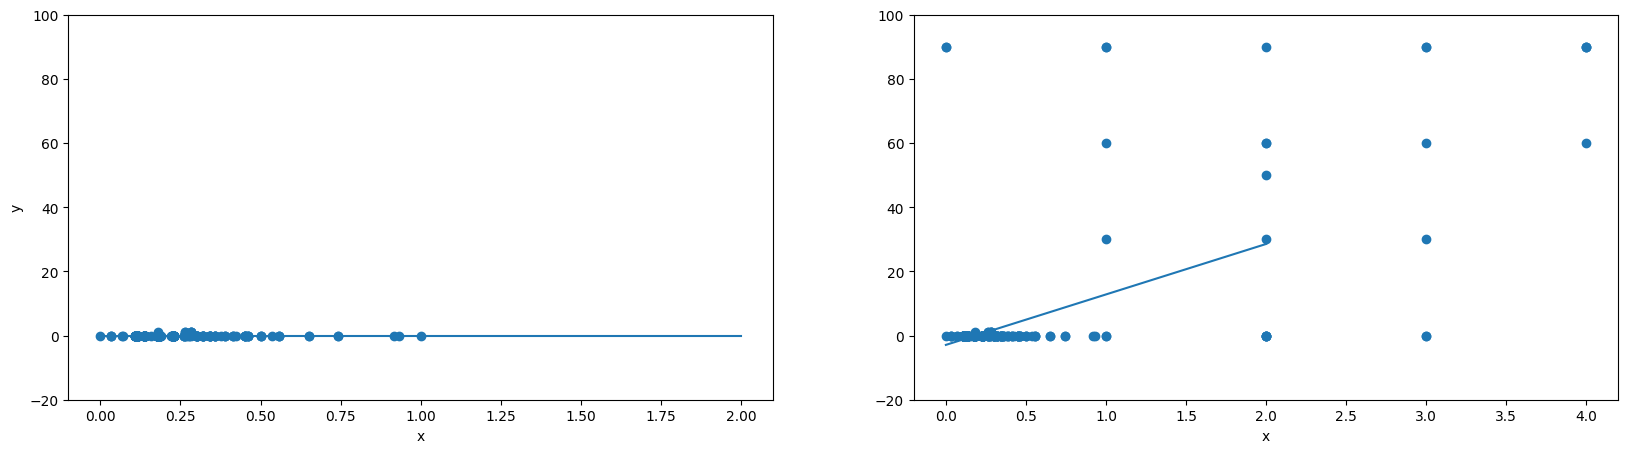

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_mod_twice)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show();

As you can see, MAE didn't cope with increased number of outliers.

### Huber Loss

Sometimes, because MAE sustainable to noise objects and as MSE have small fine for small deviations, some "hybrid" of MAE and MSE is used. This hybrid calls Huber Loss

$$L_{i}(y_i, a(x_i)) = \phi_{\varepsilon} (a(x_i) - y_i)$$
$$ \phi_{\epsilon}(z) = \begin{cases} \dfrac{1}{2}z^2, if -\varepsilon < z < \varepsilon \\ \varepsilon(|z| - \dfrac{1}{2}\varepsilon), otherwise \end{cases}$$

Optimization of Huber Loss is implemented in `sklearn`.

Let's try implemented it by ourselves as a function as an exercise.

In [44]:
def Huber(y, y_pred):
    res = 0
    for i in range(len(y)):
        z = y_pred[i] - y[i]

        if np.abs(z) < 1:
            res += 0.5*z
        else:
            res += np.abs(z) - 0.5
    return res

a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
huber = Huber(y=a, y_pred=pred)
print("Huber Loss is", huber)

Huber Loss is 3.25


### Mean Square Logarithmic Error (MSLE)

This loss function is used in cases when we want to receive underestimated prediction than overpriced.

$$ L_i(a, X_i, Y_i) = (ln(a(x_i) + 1) - ln(y_i + 1))^2 $$

<u><b>Note</b></u>: Because of logarithm in formula <b>for using MSLE the target variable must be positive</b>. 

Let's implement MSLE as an exercise.

In [45]:
def MSLE(y, y_pred):
    res = 0
    for i in range(len(y)):
        res += np.log(y[i] + 1) - np.log(y_pred[i] + 1)
    return res

a = np.array([11, 20, 19, 17, 10])
pred = np.array([12, 18, 19.5, 18, 9])
msle = MSLE(y=a, y_pred=pred)
print("MSLE is", msle)

MSLE is 0.03659109682712369


### Quantile Loss

In some problems fine for an error depends on both value of absolute deviation from GT and on sign of the deviation. For example, you'd better predict demand more than it will be in fact because otherwise you will lose profit. In such problems the following loss finction is used:
$$ L_i(y_i, a(x_i)) = \rho_{\tau}(y_i - x^{T}_{i}\omega)$$
$$ \rho_{\tau} = \begin{cases} \tau z, z > 0 \\ (\tau - 1)z, z \le 0  \end{cases} $$

The $\tau \in (0, 1)$ parameter influence on difference between fines for positive and negative deviation. 

Let's see how linear regression will look like with different values of quantile.

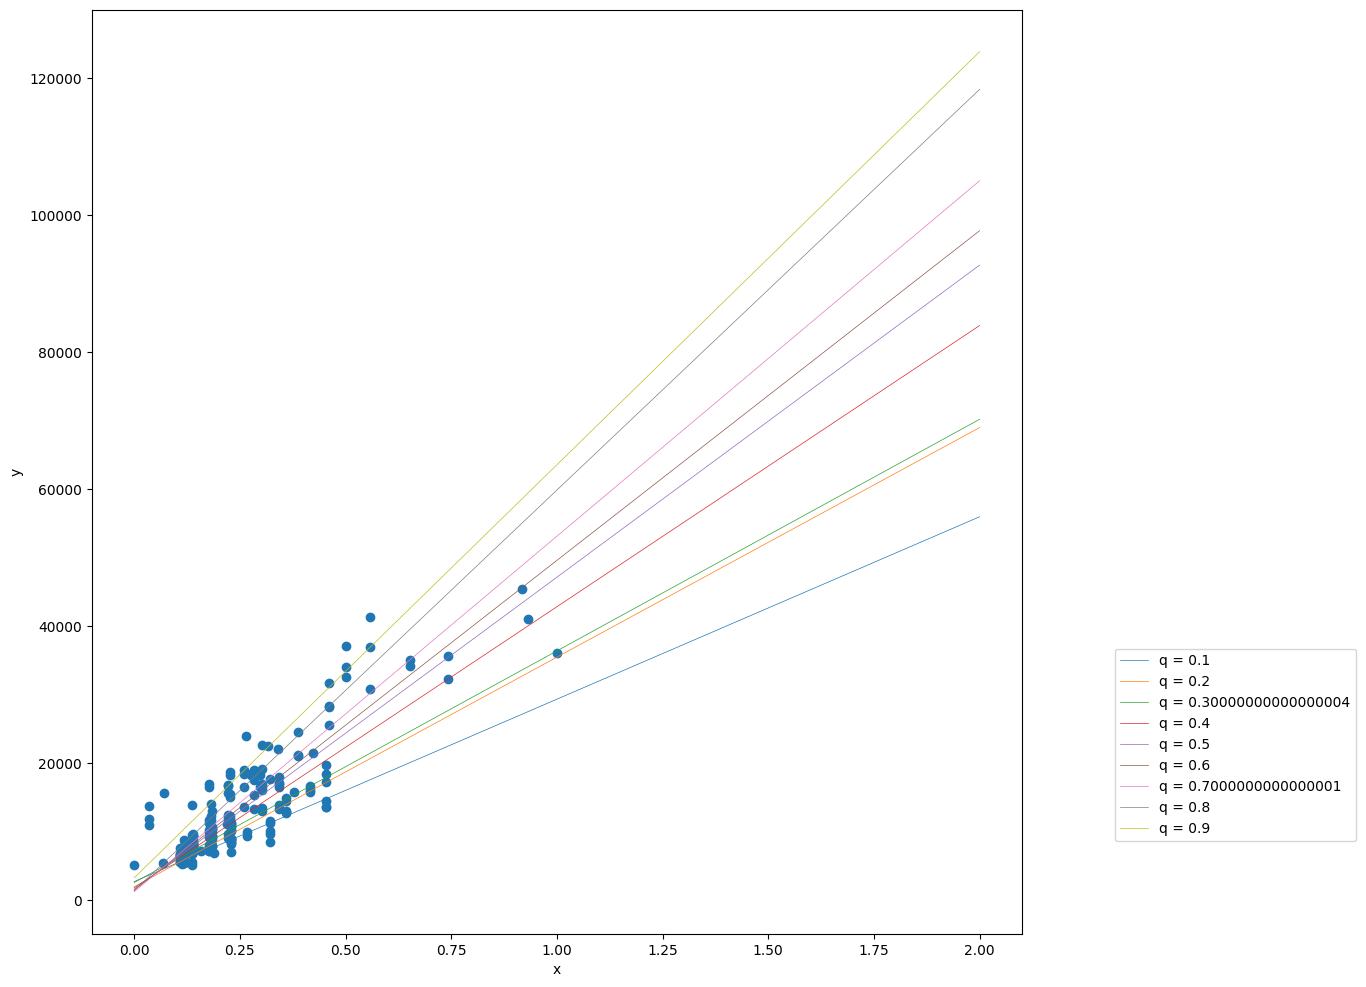

In [56]:
plt.figure(figsize=(12, 12))
plt.scatter(X[7], y)

grid = np.linspace(0, 2, 100)
dat = pd.DataFrame({"x" : X[7], "y": y})
mod = smf.quantreg("y ~ x", dat)

for q in np.arange(0.1, 1, 0.1):
    res = mod.fit(q=q)
    plt.plot(
        grid,
        grid * res.params["x"] + res.params["Intercept"],
        linewidth=0.5,
        label="q = " + str(q),
    )

plt.legend(loc=(1.1, 0.1))
plt.xlabel("x")
plt.ylabel("y")
plt.show();

## Linear regression practice

Dataset consists of information about communities in the USA. We'll try to predict number of violent crimes relatively to each group of population.

In [1]:
import warnings

import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("crimedata.csv", na_values=["?"])

# Take only required columns
requiredColumns = [5, 6] + list(range(11, 26)) + list(range(32, 103)) + [145]
data = data[data.columns[requiredColumns]]

# Some values of targer variable are missed
X = data.loc[data["ViolentCrimesPerPop"].notnull(), :].drop(
    "ViolentCrimesPerPop", axis=1
)

y = data["ViolentCrimesPerPop"][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
X_train

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
603,21128,2.50,13.09,25.19,12.81,14.55,21128,100.0,25547,71.79,...,24.5,15.2,11.7,0,0,2.25,74.47,63.00,91.98,96.22
590,15791,3.42,17.55,32.30,17.00,10.11,0,0.0,24128,77.29,...,29.1,22.1,11.0,0,0,28.40,50.62,45.21,79.38,90.01
1649,64989,2.59,12.89,29.89,14.92,10.57,64972,100.0,42948,84.20,...,25.7,21.4,13.6,92,0,11.70,62.45,55.47,78.51,87.73
1325,35800,2.53,12.89,28.06,12.42,6.05,35800,100.0,42299,89.74,...,24.7,20.5,11.9,0,0,9.57,39.82,36.90,68.33,76.63
1250,16032,2.53,11.91,23.09,10.78,15.49,15995,100.0,36977,75.03,...,23.9,17.0,11.6,0,0,0.76,63.54,61.90,84.59,90.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,17301,2.74,13.96,23.08,10.97,10.20,17301,100.0,46353,81.62,...,24.1,19.4,12.2,0,0,2.94,68.08,49.71,82.44,87.58
1358,33687,2.43,10.50,24.43,11.32,16.51,0,0.0,35230,76.35,...,24.6,24.2,14.0,5,0,6.77,73.23,57.80,87.32,92.62
1845,19513,2.76,13.71,27.38,12.38,7.57,19513,100.0,39995,86.21,...,22.8,19.5,13.0,0,0,2.74,81.22,59.29,87.82,94.57
624,14967,2.60,13.56,26.03,11.61,7.51,14967,100.0,36999,86.99,...,24.5,21.7,11.7,0,0,1.51,70.08,49.25,77.25,88.56


### Baseline

Training of linear regression and print quality by metric MSE on train and test dataset.

In [4]:
lr = LinearRegression().fit(X_train, y_train)
print("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

Train: 119935.90613769476
Test: 206978.88437924988


We can see that loss on train is lower than on test. So, we probably overfitted.

<b>Regularization</b> is a popular method for regression models.

While optimization of linear regression weights of the variables may be large in absolute value. It isn't good because the model will be very sensitive to very small changes in features of an ogject, and as a consequence will be overfitted.

To avoid such a situation you can add to the loss function a regularizer fining the model for too much norm of the weights vector:
$$ Q\alpha(\omega) = Q(\omega) + \alpha R(\omega) $$
where $R(\omega)$ is regularizer.

The most used regularizers are $L_1$ and $L_2$ regularizers.
$$(Lasso) L_1: R(\omega) = ||\omega||_1 = \sum^{d}_{i}\omega^{2}_{i}$$
$$(Ridge) L_2: R(\omega) = ||\omega||_2 = \sum^{d}_{i}|\omega_{i}|$$

Let's use $L_2$ regularization for avoiding of overfitting.

In [5]:
ridge = Ridge(5.0).fit(X_train, y_train)
print("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))

Train: 120349.55028715731
Test: 206958.22395453462


It seems like nothing is change. But our data is non-scaled data. Let's scale it.

### Scaling 

In [6]:
sc = MinMaxScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=sc.fit_transform(X_test), columns=X_test.columns)

In [7]:
# Scaled data without regularization

lr = LinearRegression().fit(X_train_scaled, y_train)
print("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_scaled))))
print("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_scaled))))

Train: 119970.07563421821
Test: 3.023135096274634e+29


In [8]:
# Scaled data with regularization

ridge = Ridge(5.0).fit(X_train_scaled, y_train)
print("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_scaled))))
print("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_scaled))))

Train: 131185.03859170148
Test: 150608.31943341988


As you can see, scaling of data and regularization are powerful tools for avoiding overfitting.

### High/low variance

Whether positive features with high dispersion for quality of the model? And with low dispersion?
Let's consider importance of features with different statistical properties for fitting of the model.

In [9]:
features_variance = X_train_scaled.var().sort_values(ascending=False)
features_variance.head()

pctUrban          0.197731
RentHighQ         0.063005
MedYrHousBuilt    0.054831
OwnOccHiQuart     0.048807
MedRent           0.046863
dtype: float64

Try to remove the features with high dispersion and see how quality will change. In `sklearn` there is a tool for such operation.

In [10]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
# You can remove all the features with dispersion higher than a threshold

vs_transformer = VarianceThreshold(0.01)

X_train_var = pd.DataFrame(
    data=vs_transformer.fit_transform(X_train_scaled),
    columns=X_train_scaled.columns[vs_transformer.get_support()],
)

X_test_var = pd.DataFrame(
    data=vs_transformer.transform(X_test_scaled),
    columns=X_test_scaled.columns[vs_transformer.get_support()],
)

X_train_var.shape

(1495, 76)

In [12]:
# Scaled and filterd from dispersion data without regularization

lr = LinearRegression().fit(X_train_var, y_train)
print("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_var))))
print("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_var))))

Train: 125706.38916046257
Test: 177829.70312470733


In [13]:
# Scaled data with regularization

ridge = Ridge(5.0).fit(X_train_var, y_train)
print("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_var))))
print("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_var))))

Train: 136186.7830145162
Test: 151353.67582157094


<u><b>Conclusion</b></u>: Data with low dispersion are useful for the model but it's reasonable to use not so hard threshold because of risk of underfitting because of lack of data.

### Correlation

We can choose k features which gives us the highest values of correlation to target variable.

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

In [15]:
sb = SelectKBest(f_regression, k=15)

X_train_kbest = pd.DataFrame(
    data=sb.fit_transform(X_train_var, y_train),
    columns=X_train_var.columns[sb.get_support()],
)

X_test_kbest = pd.DataFrame(
    data=sb.transform(X_test_var),
    columns=X_test_var.columns[sb.get_support()],
)

In [16]:
# Scaled and filterd from dispersion data without regularization but with k best correlating features

lr = LinearRegression().fit(X_train_kbest, y_train)
print("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_kbest))))
print("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_kbest))))

Train: 147378.18578795987
Test: 192053.80426842152


In [17]:
# Scaled data with regularization and with k best correlating features

ridge = Ridge(5.0).fit(X_train_kbest, y_train)
print("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_kbest))))
print("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_kbest))))

Train: 158023.1329983349
Test: 164524.47840110675


We can also select the most important features from point of regression but with $L_1$ regularization. 

In [18]:
from sklearn.feature_selection import SelectFromModel

In [19]:
lasso = Lasso(5.0)
l1_select = SelectFromModel(lasso)

X_train_l1 = pd.DataFrame(
    data=l1_select.fit_transform(X_train_var, y_train),
    columns=X_train_var.columns[l1_select.get_support()],
)

X_test_l1 = pd.DataFrame(
    data=l1_select.transform(X_test_var),
    columns=X_test_var.columns[l1_select.get_support()],
)

X_train_l1.shape

(1495, 12)

In [20]:
lr = LinearRegression().fit(X_train_l1, y_train)
print("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_l1))))
print("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_l1))))

Train: 140757.45879349473
Test: 152619.09357166698


In [21]:
ridge = Ridge(5.0).fit(X_train_l1, y_train)
print("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_l1))))
print("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_l1))))

Train: 143263.16845636506
Test: 154121.19971173196


We didn't obtain the value of the error better than we obtain in the steps before. 

### Pipeline

Let's do all the steps above in one pipeline.

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
pipe = Pipeline(
    steps=[
     ("scaler", MinMaxScaler()),
     ("variance", VarianceThreshold(0.01)),
     ("selection", SelectFromModel(Lasso(5.0))),
     ("regressor", Ridge(5.0)),
    ]
)

pipe.fit(X_train, y_train)
pipe.named_steps

{'scaler': MinMaxScaler(),
 'variance': VarianceThreshold(threshold=0.01),
 'selection': SelectFromModel(estimator=Lasso(alpha=5.0)),
 'regressor': Ridge(alpha=5.0)}

In [24]:
print("Train: {}".format(mean_squared_error(y_train, pipe.predict(X_train))))
print("Test: {}".format(mean_squared_error(y_test, pipe.predict(X_test))))

Train: 143263.16845636506
Test: 157553.3653317403


We can iterate over hyperparameters of the model to choose the best with `GridSearch`.

In [25]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('variance', VarianceThreshold(threshold=0.01)),
  ('selection', SelectFromModel(estimator=Lasso(alpha=5.0))),
  ('regressor', Ridge(alpha=5.0))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'variance': VarianceThreshold(threshold=0.01),
 'selection': SelectFromModel(estimator=Lasso(alpha=5.0)),
 'regressor': Ridge(alpha=5.0),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'variance__threshold': 0.01,
 'selection__estimator__alpha': 5.0,
 'selection__estimator__copy_X': True,
 'selection__estimator__fit_intercept': True,
 'selection__estimator__max_iter': 1000,
 'selection__estimator__positive': False,
 'selection__estimator__precompute': False,
 'selection__estimator__random_state': None,
 'selection__estimator__selection': 'cyclic',
 'selection__estimator__tol': 0.0001,
 'selection__estimator__warm_start': False,
 'selection__estimator': Lasso(alpha=5.0),
 'selection__importance_getter': '

In [26]:
param_grid = {
    'variance__threshold': [0.005, 0.0075, 0.009, 0.01, 0.011, 0.012], 
    'selection__estimator__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0],
    'regressor__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0], # regularizer parameters
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('variance',
                                        VarianceThreshold(threshold=0.01)),
                                       ('selection',
                                        SelectFromModel(estimator=Lasso(alpha=5.0))),
                                       ('regressor', Ridge(alpha=5.0))]),
             param_grid={'regressor__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0,
                                              10.0],
                         'selection__estimator__alpha': [0.1, 0.5, 1.0, 1.5,
                                                         2.0, 5.0, 10.0],
                         'variance__threshold': [0.005, 0.0075, 0.009, 0.01,
                                                 0.011, 0.012]})

In [27]:
pipe_best = grid_search.best_estimator_
pipe_best.named_steps

{'scaler': MinMaxScaler(),
 'variance': VarianceThreshold(threshold=0.01),
 'selection': SelectFromModel(estimator=Lasso(alpha=0.1)),
 'regressor': Ridge(alpha=0.5)}

In [28]:
pipe_best.fit(X_train, y_train)
print("Train: {}".format(mean_squared_error(y_train, pipe_best.predict(X_train))))
print("Test: {}".format(mean_squared_error(y_test, pipe_best.predict(X_test))))

Train: 128441.16453337159
Test: 147186.92249142204
